# Tiền xử lý dữ liệu và EDA từng bước
### Giới thiệu về tập dữ liệu
#### Bộ dữ liệu này chứa phản hồi tự báo cáo về độ vừa vặn của quần áo từ khách hàng cũng như các thông tin phụ khác như đánh giá, xếp hạng, danh mục sản phẩm, kích cỡ danh mục, số đo của khách hàng (v.v.) từ 2 trang web:

## Modcloth

## Renttherunway

#### [1] ModCloth bán quần áo và phụ kiện cổ điển dành cho phụ nữ, từ đó người phụ trách tập dữ liệu đã thu thập dữ liệu từ ba danh mục: váy, áo và quần. RentTheRunWay là một nền tảng độc đáo cho phép phụ nữ thuê quần áo cho nhiều dịp khác nhau; họ đã thu thập dữ liệu từ một số danh mục.

#### Lưu ý: Trong cả hai tập dữ liệu, phản hồi phù hợp thuộc về một trong ba loại: 'Nhỏ', 'Vừa' và 'Lớn'. Ngoài ra, một số giả định đã được đưa ra về các tính năng trong tập dữ liệu.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../LTPTDL1/Tuan7"))

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

['modcloth_final_data', 'modcloth_final_data.json.zip', 'renttherunway_final_data', 'renttherunway_final_data.json.zip']


In [ ]:
# Execute this in your kernel to view the first n (here-4) lines of the json file.
! head -n 4 ../LTPTDL1/Tuan7/modcloth_final_data/modcloth_final_data.json

### Bộ dữ liệu Modcloth
### Nhập dữ liệu bằng Pandas

#### Hãy xem một vài dòng đầu tiên của tệp json của dữ liệu modcloth bằng cách sử dụng đầu lệnh bash hệ điều hành sẵn có.
#### Sử dụng hàm pd.read_json(), tệp json được đưa vào DataFrame của gấu trúc, với tham số dòng là True- vì mọi đối tượng mới được phân tách bằng một dòng mới.

In [5]:
mc_df = pd.read_json('../LTPTDL1/Tuan7_2/1/modcloth_final_data.json', lines=True)
mc_df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


### EDA - Phân tích dữ liệu thăm dò
#### Chúng ta đã có thể thực hiện một số quan sát ở đây bằng cách nhìn vào phần đầu của dữ liệu:

#### Có các giá trị bị thiếu trên khung dữ liệu cần được xử lý.

#### Kích thước cốc chứa nhiều tùy chọn - sẽ cần xử lý nếu chúng tôi muốn xác định kích thước cốc là kiểu dữ liệu 'danh mục'.

#### Cột chiều cao cần được phân tích cú pháp để trích xuất chiều cao theo số lượng, hiện tại nó trông giống như một chuỗi (đối tượng).

#### Không quá quan trọng, nhưng một số cột có thể thực hiện đổi tên - để xóa khoảng trắng.

#### Đầu tiên, chúng tôi xử lý việc đặt tên các cột để dễ truy cập trong pandas.

In [6]:
mc_df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [7]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

#### Chúng tôi có thể mở rộng quan sát của mình về dữ liệu bị thiếu và các kiểu dữ liệu tại đây:

#### .Trong số 18 cột thì chỉ có 6 cột có dữ liệu đầy đủ.

#### .Khá nhiều dữ liệu dường như bị thiếu về vòng ngực, chiều rộng giày, cỡ giày và vòng eo.

#### .Chúng tôi có thể đặc biệt muốn xem xét các mặt hàng có sẵn cỡ giày và chiều rộng giày - đây có thể là giày!

#### .Rất nhiều cột có các chuỗi (kiểu dữ liệu đối tượng), cần được phân tích cú pháp thành kiểu dữ liệu danh mục (cũng hỗ trợ tiêu thụ bộ nhớ hiệu quả).

#### .Cột eo đáng ngạc nhiên có rất nhiều giá trị NULL - vì hầu hết dữ liệu từ Modcloth đến từ 3 loại 'váy, áo và quần'.

#### Nhìn vào phần trăm giá trị bị thiếu trên mỗi cột

In [18]:
missing_data = pd.DataFrame({'total_missing': mc_df.isnull().sum(), 'perc_missing': (mc_df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


### Mô tả thống kê các biến số

In [19]:
mc_df.describe()

,item_id,waist,size,quality,hips,bra size,user_id,shoe size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27914.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.144748
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.324130
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,11.500000


#### Một số quan sát quan trọng hơn ở đây, trước khi chúng tôi đi sâu vào thực hiện các tác vụ xử lý trước dữ liệu của mình:

#### Bra_size, hông có thể không cần phải là loại dtype nổi?

#### Hầu hết các cỡ giày đều nằm trong khoảng 5-9, nhưng cỡ giày tối đa là 38! (Thật ngạc nhiên khi trang web sử dụng cỡ giày của Vương quốc Anh.)

#### Kích thước có giá trị tối thiểu là 0 và Kích thước tối đa phù hợp với cỡ giày tối đa.

### Boxplot của các biến số

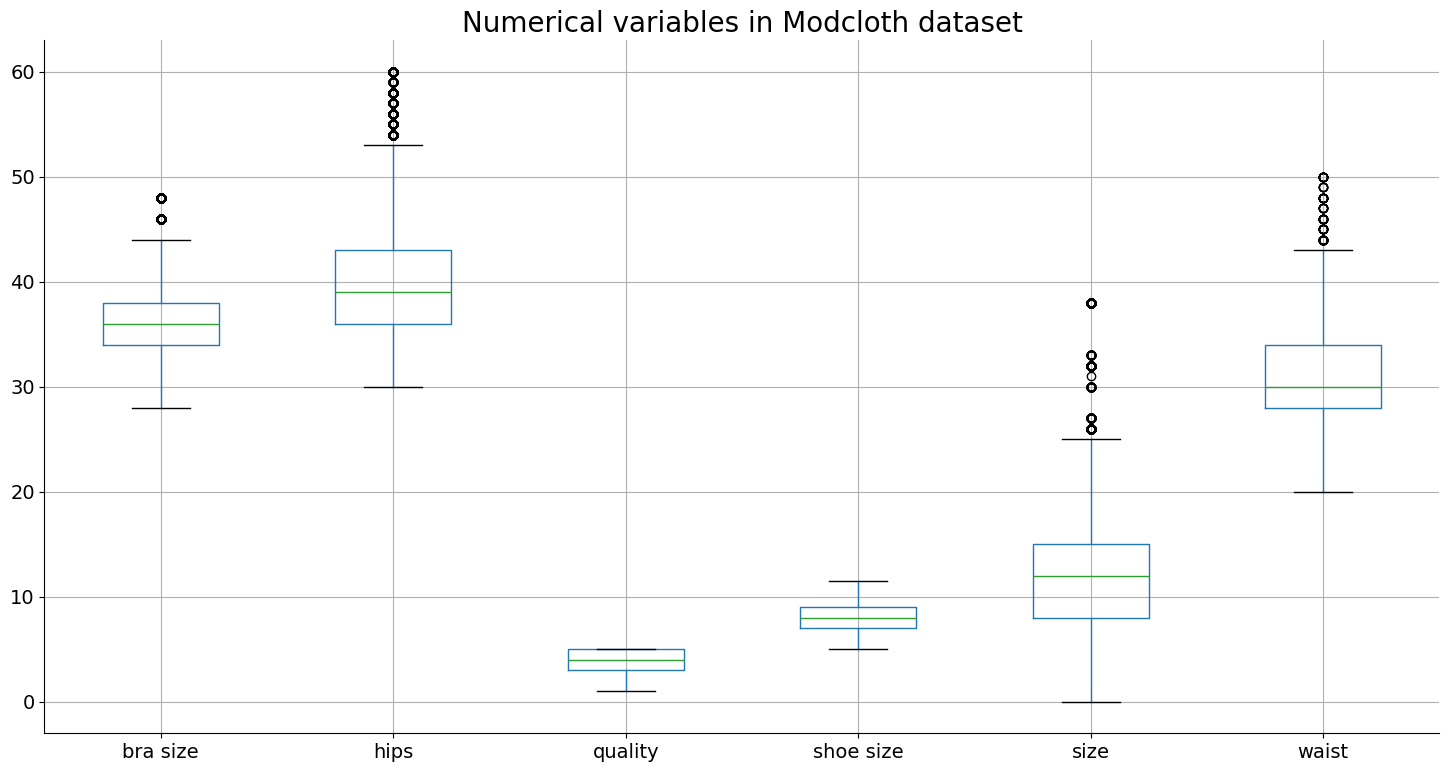

In [25]:
num_cols = ['bra size','hips','quality','shoe size','size','waist']
plt.figure(figsize=(18,9))
mc_df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

### Xử lý các ngoại lệ

#### shoe_size: Chúng ta có thể thấy rõ rằng giá trị tối đa duy nhất của cỡ giày (38) là một giá trị ngoại lệ và lý tưởng nhất là chúng ta nên loại bỏ hàng đó hoặc xử lý giá trị ngoại lệ đó. Chúng ta hãy xem mục đó trong dữ liệu của chúng tôi.

In [26]:
mc_df[mc_df['shoe size'] == 38]

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text


In [23]:
mc_df.at[37313,'shoe size'] = None

In [24]:
mc_df.sort_values(by=['bra size'], ascending=False).head(10)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...
57273,645822,NaN,32,5.0,ddd/f,55.0,48.0,tops,NaN,5ft,Lillie,just right,fit,732268,NaN,NaN,I wear this almost every,I wear this almost every single day! Yay! Some...
14033,171125,NaN,38,3.0,c,NaN,48.0,dresses,NaN,5ft 8in,dillsyrpickle,just right,small,416697,NaN,NaN,So I really wanted to lov,So I really wanted to love this dress. I'm a ...
28845,401773,NaN,26,3.0,b,55.0,48.0,new,50,5ft 6in,Michelle,just right,fit,340392,9.5,wide,These cardigans are a gre,These cardigans are a great way to achieve tha...
22637,353933,NaN,38,5.0,b,NaN,48.0,dresses,NaN,5ft 2in,Meghan,slightly long,fit,175295,NaN,NaN,No negatives to this dres,"No negatives to this dress, it's absolutely go..."
38063,417269,NaN,38,4.0,c,NaN,48.0,new,NaN,5ft 6in,Bea,very long,fit,799178,NaN,NaN,"I love the fabric, I love","I love the fabric, I love long tops, this one ..."


### Phân phối chung của bra_size so với size
#### Chúng ta có thể hình dung sự phân bổ của bra_size so với size (bivariate) để hiểu về các giá trị.

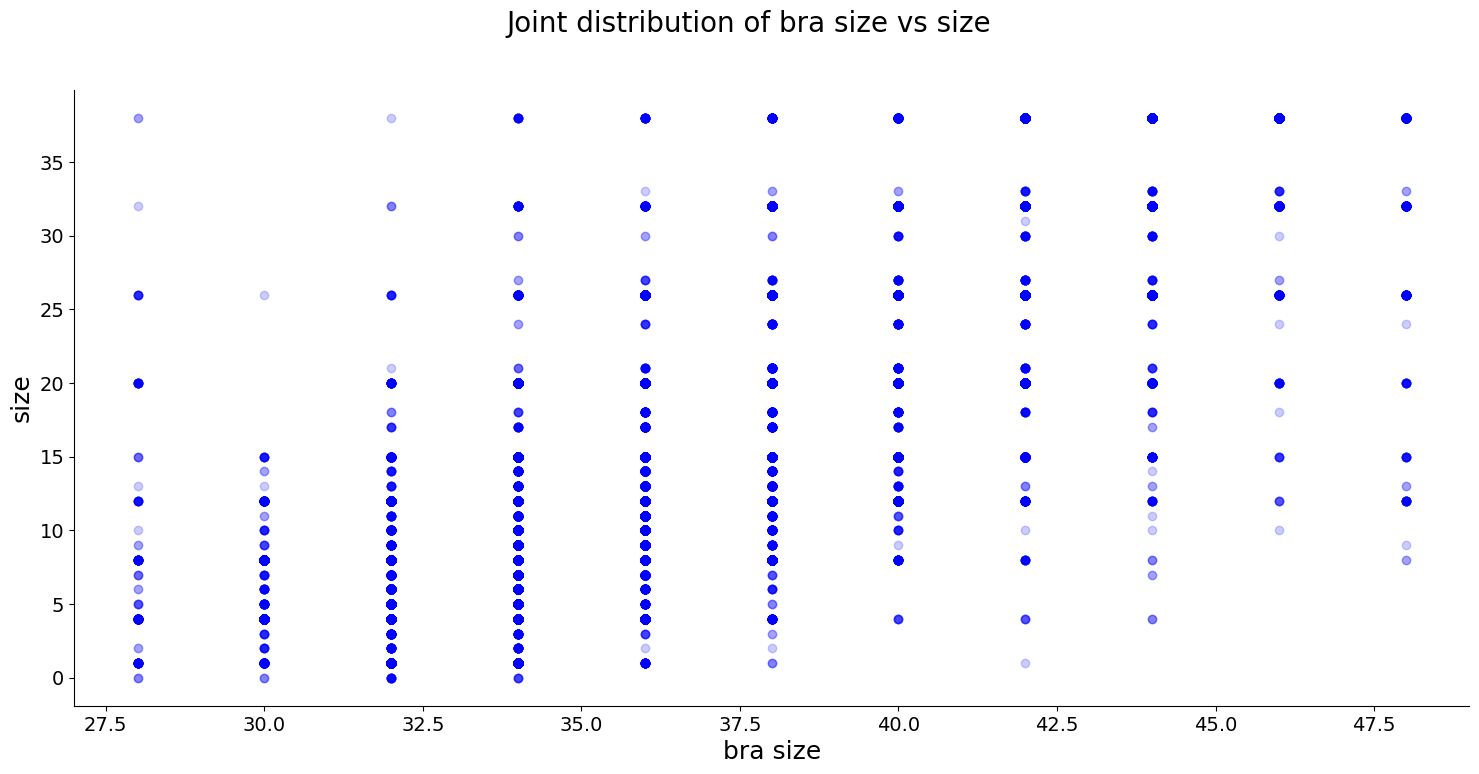

In [30]:
plt.figure(figsize=(18,8))
plt.xlabel("bra size", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of bra size vs size", fontsize=20)
plt.plot(mc_df['bra size'], mc_df['size'], 'bo', alpha=0.2)
plt.show()


### Làm sạch và tiền xử lý dữ liệu

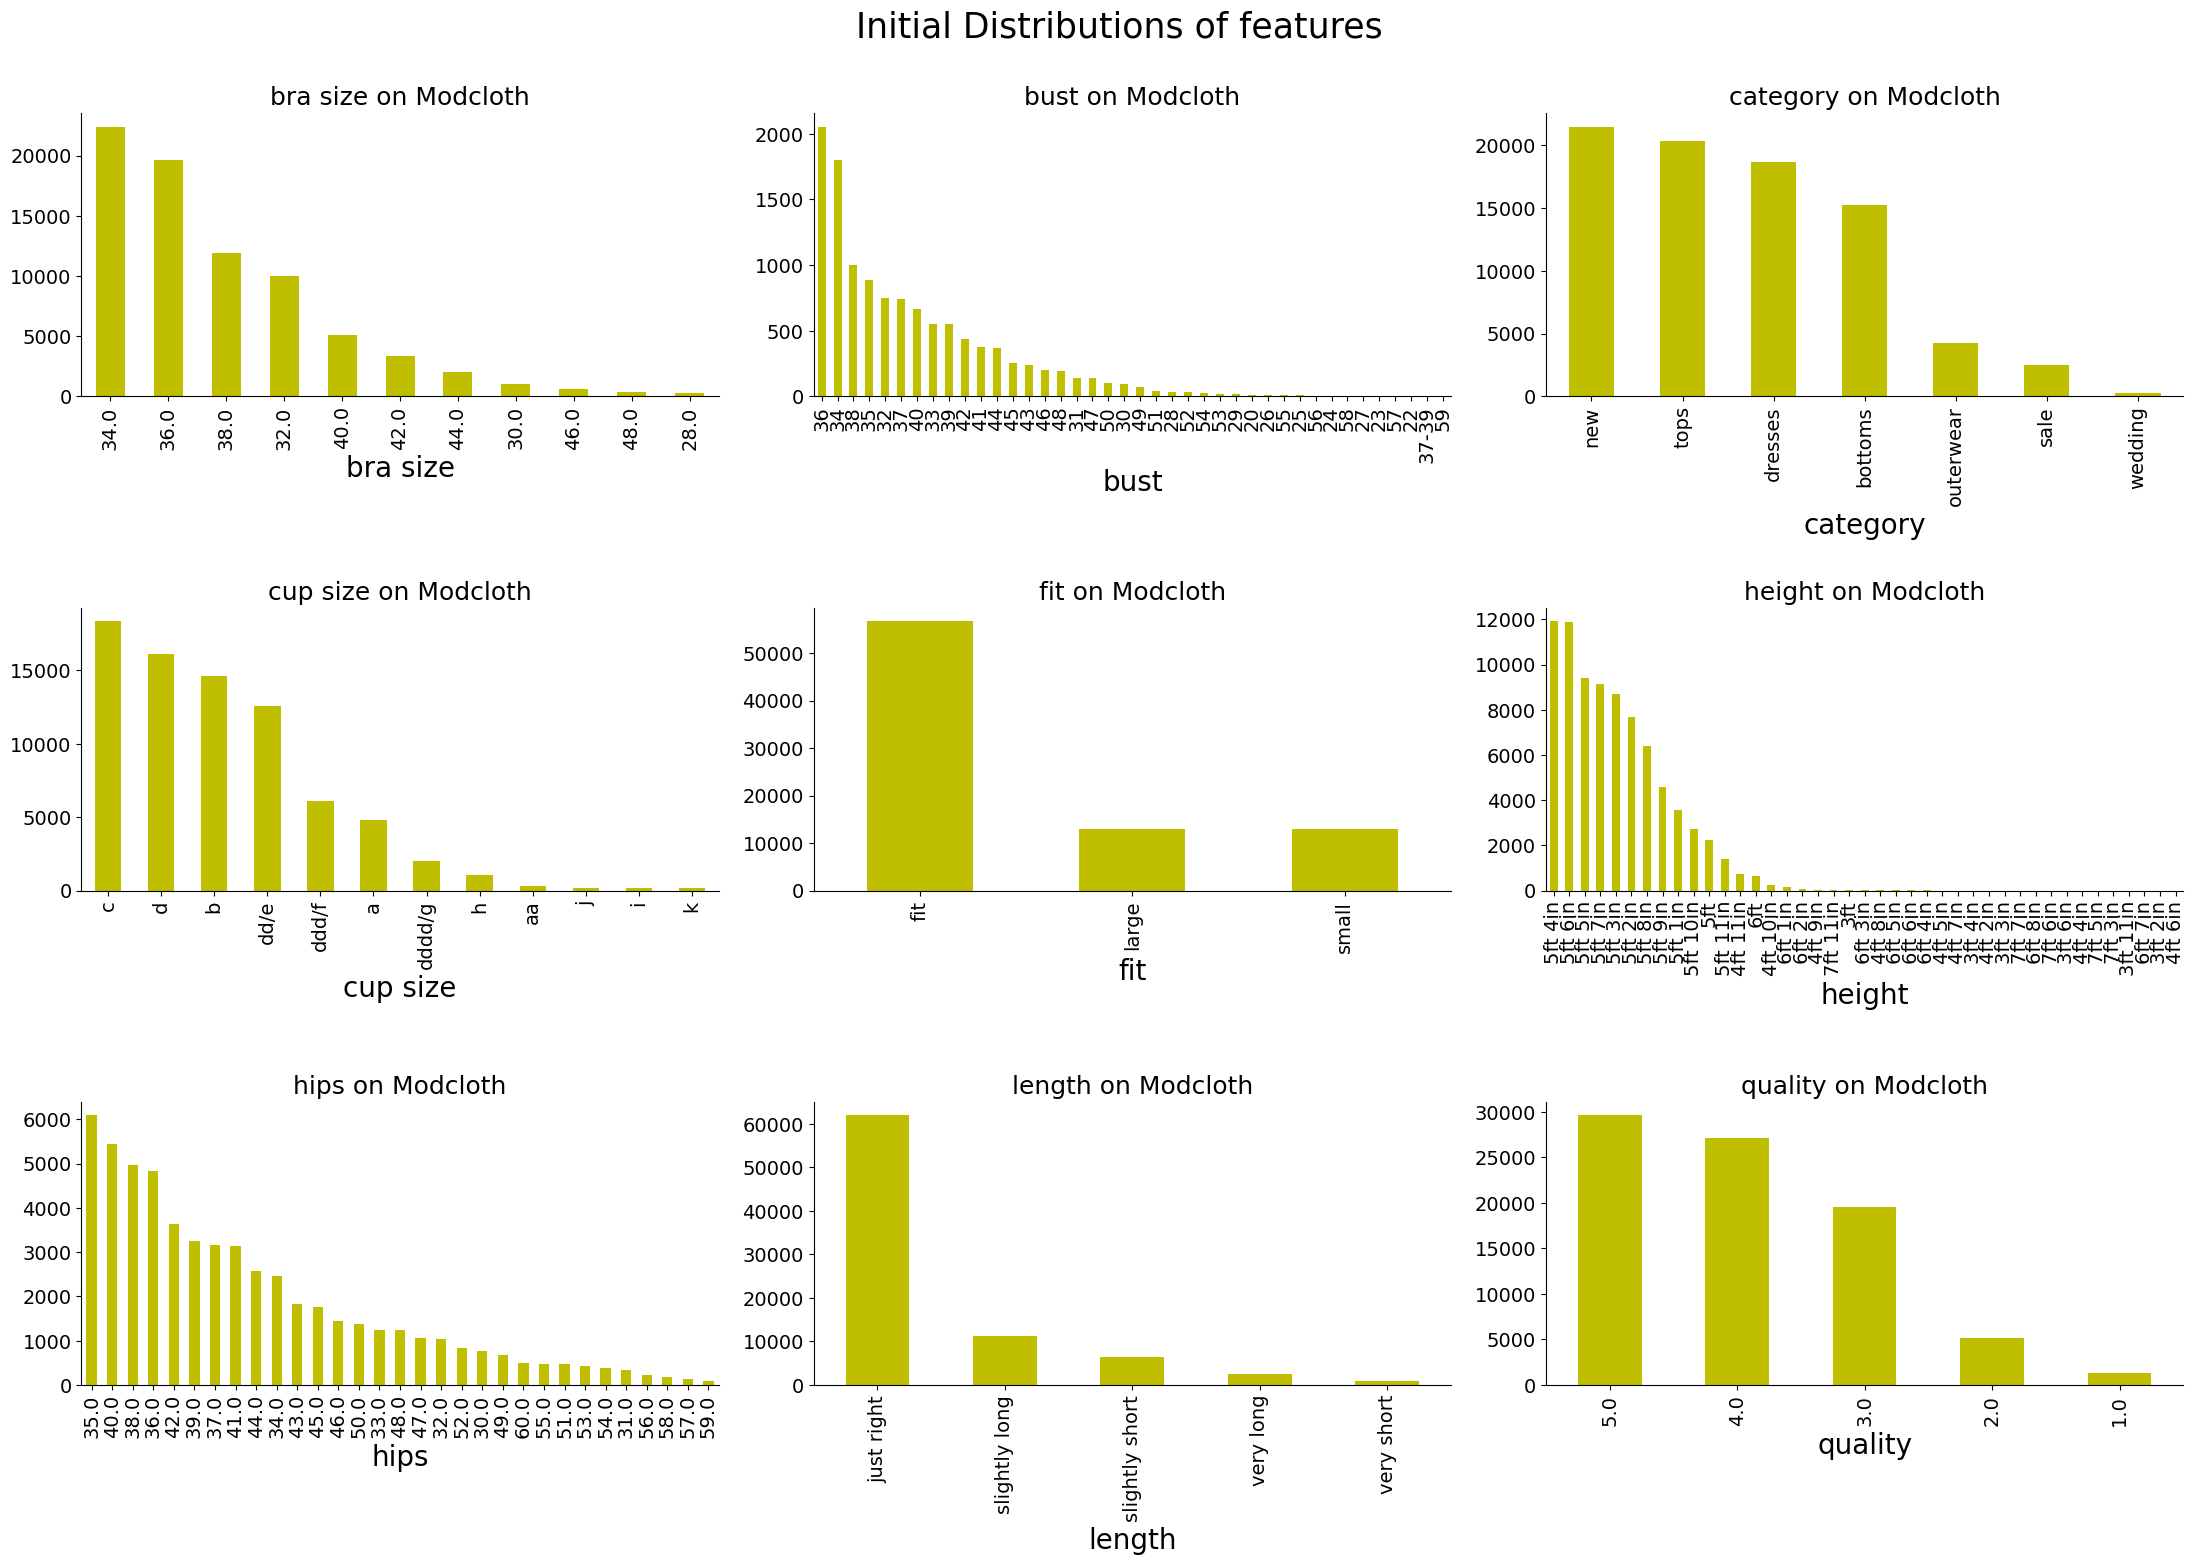

In [33]:
def plot_dist(col, ax):
    mc_df[col][mc_df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)

    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra size','bust', 'category', 'cup size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

### Xử lý tính năng từng bước:¶

#### bra_size: Mặc dù trông có vẻ bằng số nhưng nó chỉ dao động từ 28 đến 48, với hầu hết các kích cỡ nằm trong khoảng 34-38. Sẽ rất hợp lý khi chuyển đổi nó thành dtype phân loại. Chúng tôi sẽ điền các giá trị NA vào danh mục 'Không xác định'. Chúng ta có thể thấy ở trên rằng hầu hết người mua đều có cỡ áo ngực là 34 hoặc 36. 

#### bust: Chúng ta có thể thấy bằng cách xem xét các giá trị không rỗng, bức tượng bán thân đó phải là một kiểu số nguyên. Chúng ta cũng cần xử lý một trường hợp đặc biệt trong đó tượng bán thân được đưa ra là - '37-39'. Chúng tôi sẽ thay thế mục nhập '37-39' bằng giá trị trung bình, tức là 38, cho mục đích phân tích. Bây giờ chúng ta có thể chuyển đổi dtype thành int một cách an toàn. Tuy nhiên, vì thiếu khoảng 86% dữ liệu bán thân nên cuối cùng người ta quyết định loại bỏ tính năng này.

#### category - không thiếu; thay đổi thành danh mục dtype.

#### cup size - Thay đổi dtype thành danh mục cho cột này. Col này có khoảng 7% giá trị bị thiếu. Việc xem xét các hàng thiếu giá trị này có thể gợi ý cho chúng ta cách xử lý các giá trị bị thiếu này.

In [39]:
mc_df['bra size'] = mc_df['bra size'].fillna('Unknown')
mc_df['bra size'] = mc_df['bra size'].astype('category').cat.as_ordered()
mc_df.at[37313, 'bust'] = '38'
mc_df['bust'] = mc_df['bust'].fillna(0).astype(int)
mc_df['category'] = mc_df['category'].astype('category')


In [42]:
mc_df[mc_df['cup size'].isnull()].sample(20)


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
82083,806856,NaN,1,4.0,NaN,NaN,Unknown,outerwear,0,5ft 4in,kathrynmreeves,just right,large,527285,NaN,NaN,beautiful coat in every w,"beautiful coat in every way except size, sadly..."
8777,161514,NaN,12,3.0,NaN,NaN,Unknown,dresses,0,5ft 3in,bonniemanderley,just right,fit,517681,NaN,NaN,love it! classic look gre,love it! classic look great for professional a...
63656,668696,NaN,8,3.0,NaN,NaN,Unknown,bottoms,0,5ft 6in,ciclyg,slightly long,large,206646,NaN,NaN,I only wish this skirt ha,I only wish this skirt had more of an elastic ...
36683,415598,NaN,32,5.0,NaN,NaN,Unknown,new,0,5ft 8in,irishsunnshine,just right,fit,739987,NaN,NaN,Could be a bit longer.,Could be a bit longer.
66706,697835,NaN,26,4.0,NaN,NaN,Unknown,bottoms,0,5ft 2in,melrob2177,just right,fit,104418,NaN,NaN,love them!,love them!
34824,412737,NaN,15,5.0,NaN,NaN,Unknown,new,0,5ft 3in,Jaymie,just right,fit,464511,NaN,NaN,Love it lots of complimen,Love it lots of compliments
47340,515644,NaN,8,5.0,NaN,NaN,Unknown,tops,0,5ft 8in,rachel.christine7,slightly short,small,210230,8.5,NaN,I love this shirt. It is,"I love this shirt. It is a little small, which..."
17901,210299,NaN,1,4.0,NaN,NaN,Unknown,dresses,0,5ft,yvonne.tran,just right,fit,689619,NaN,NaN,Perfect length for my hei,Perfect length for my height hits right above...
3550,143287,NaN,12,3.0,NaN,37.0,Unknown,new,0,5ft 5in,Phil,just right,fit,496621,NaN,NaN,NaN,NaN
32695,407134,NaN,4,5.0,NaN,NaN,Unknown,new,0,5ft 2in,sahota_kulbir,just right,fit,597624,NaN,NaN,Love Love. Just got it to,Love Love. Just got it today and I am itching ...


#### fit- Thay đổi dtype thành danh mục cho cột này. Chúng ta có thể thấy rằng đại đa số khách hàng đều đưa ra phản hồi khá 'phù hợp' cho các mặt hàng trên Modcloth!

In [45]:
mc_df['cup size'].fillna('Unknown', inplace=True)
mc_df['cup size'] = mc_df['cup size'].astype('category').cat.as_ordered()

mc_df['fit'] = mc_df['fit'].astype('category')


### chiều cao- Chúng ta cần phân tích cột chiều cao vì hiện tại nó là một đối tượng chuỗi, có dạng - Xft. Âm. Sẽ rất hợp lý khi chuyển đổi chiều cao thành cm. Chúng tôi cũng xem xét các hàng thiếu dữ liệu chiều cao.

In [46]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
mc_df.height = mc_df.height.apply(get_cms)

In [47]:
mc_df[mc_df.height.isnull()].head(20)
# Do look at the output to be able to better understand the inferences!

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38.0,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36.0,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN
213,124124,NaN,20,4.0,d,NaN,40.0,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,NaN,NaN
382,125442,NaN,5,5.0,b,NaN,34.0,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,NaN,NaN
423,125442,NaN,7,5.0,c,NaN,34.0,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,NaN,NaN
456,125442,NaN,7,5.0,b,NaN,38.0,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,NaN,NaN
475,125442,NaN,7,5.0,dd/e,36.0,30.0,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,NaN,NaN


### Kỹ thuật tính năng

In [49]:
print(mc_df[((mc_df['bra size'] != 'Unknown') | (mc_df['cup size'] != 'Unknown')) & (mc_df['height'].isnull()) & (mc_df['hips'].isnull()) &
     (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull()) & (mc_df['waist'].isnull())].head(3))
print(mc_df[(mc_df['bra size'] == 'Unknown') & (mc_df['cup size'] == 'Unknown') & (mc_df['height'].isnull()) & (mc_df['hips'].isnull()) &
     ((mc_df['shoe size'].notnull()) | (mc_df['shoe width'].notnull())) & (mc_df['waist'].isnull())].head(3))
print(mc_df[(mc_df['bra size'] == 'Unknown') & (mc_df['cup size'] == 'Unknown') & (mc_df['height'].isnull()) & ((mc_df['hips'].notnull()) | (mc_df['waist'].notnull())) &
     (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull())].head(3))


    item_id  waist  size  quality cup size  hips bra size category  bust  \
3    123373    NaN    21      5.0     dd/e   NaN  Unknown      new     0   
17   123373    NaN    15      4.0   dddd/g   NaN     36.0      new     0   
43   123373    NaN    15      5.0     dd/e   NaN     36.0      new     0   

    height     user_name      length    fit  user_id  shoe size shoe width  \
3      NaN  alexmeyer626  just right    fit   875643        NaN        NaN   
17     NaN         Megan  just right  large   128353        NaN        NaN   
43     NaN       sdhewey  just right    fit   670919        NaN        NaN   

   review_summary review_text  
3             NaN         NaN  
17            NaN         NaN  
43            NaN         NaN  
     item_id  waist  size  quality cup size  hips bra size category  bust  \
553   125442    NaN     7      5.0  Unknown   NaN  Unknown      new     0   
591   125442    NaN     7      3.0  Unknown   NaN  Unknown      new     0   
665   125442    NaN    

In [51]:
lingerie_cond = (((mc_df['bra size'] != 'Unknown') | (mc_df['cup size'] != 'Unknown')) & (mc_df['height'].isnull()) & (mc_df['hips'].isnull()) &
     (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull()) & (mc_df['waist'].isnull()))
shoe_cond = ((mc_df['bra size'] == 'Unknown') & (mc_df['cup size'] == 'Unknown') & (mc_df['height'].isnull()) & (mc_df['hips'].isnull()) &
     ((mc_df['shoe size'].notnull()) | (mc_df['shoe width'].notnull())) & (mc_df['waist'].isnull()))
dress_cond = ((mc_df['bra size'] == 'Unknown') & (mc_df['cup size'] == 'Unknown') & (mc_df['height'].isnull()) & ((mc_df['hips'].notnull()) | (mc_df['waist'].notnull())) &
     (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull()))

#print(len(mc_df[lingerie_cond]))   # To check if these items add up in the final column we are adding.
#print(len(mc_df[shoe_cond]))
#print(len(mc_df[dress_cond]))
mc_df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
print("Column added!")
print("Total transactions by first time users who bought bra, shoes, or a dress: " + str(sum(mc_df.first_time_user)))
print("Total first time users: " + str(len(mc_df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))

Column added!
Total transactions by first time users who bought bra, shoes, or a dress: 903
Total first time users: 565


In [52]:
# Handling hips column
mc_df.hips = mc_df.hips.fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
mc_df.hips = pd.cut(mc_df.hips, bins, labels=labels)

# Handling length column
missing_rows = mc_df[mc_df.length.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

# Handling quality
missing_rows = mc_df[mc_df.quality.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)
mc_df.quality = mc_df.quality.astype('category').cat.as_ordered()

In [57]:
from pandas.api.types import CategoricalDtype

shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)

# Đảm bảo tên cột là chính xác và không bị sai chính tả
mc_df['review_summary'] = mc_df['review_summary'].fillna('Unknown')
mc_df['review_text'] = mc_df['review_text'].fillna('Unknown')
mc_df['shoe size'] = mc_df['shoe size'].fillna('Unknown')
mc_df['shoe size'] = mc_df['shoe size'].astype('category').cat.as_ordered()

# Đảm bảo tên cột và loại dữ liệu là chính xác
mc_df['shoe width'] = mc_df['shoe width'].fillna('Unknown')
mc_df['shoe width'] = mc_df['shoe width'].astype(shoe_widths_type)

# Kiểm tra lại tên cột và xác định xem cột đã bị thay đổi hoặc loại bỏ chưa
# Nếu cột 'waist', 'bust', 'user name' vẫn tồn tại trong DataFrame, hãy xác định lại tên cột hoặc loại bỏ chúng.
mc_df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)

# Kiểm tra lại cột 'height' và xem có giá trị bị thiếu không
# Nếu không, không cần loại bỏ bất kỳ hàng nào.
missing_rows = mc_df[mc_df['height'].isnull()].index
mc_df.drop(missing_rows, axis=0, inplace=True)


In [58]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81594 entries, 0 to 82789
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81594 non-null  int64   
 1   size             81594 non-null  int64   
 2   quality          81594 non-null  category
 3   cup size         81594 non-null  category
 4   hips             81594 non-null  category
 5   bra size         81594 non-null  category
 6   category         81594 non-null  category
 7   height           81594 non-null  float64 
 8   length           81594 non-null  object  
 9   fit              81594 non-null  category
 10  user_id          81594 non-null  int64   
 11  shoe size        81594 non-null  category
 12  shoe width       81594 non-null  category
 13  review_summary   81594 non-null  object  
 14  review_text      81594 non-null  object  
 15  first_time_user  81594 non-null  bool    
 16  review summary   81594 non-null  object  
dty

### EDA thông qua trực quan hóa


#### 1. Phân phối các tính năng khác nhau trên tập dữ liệu Modcloth

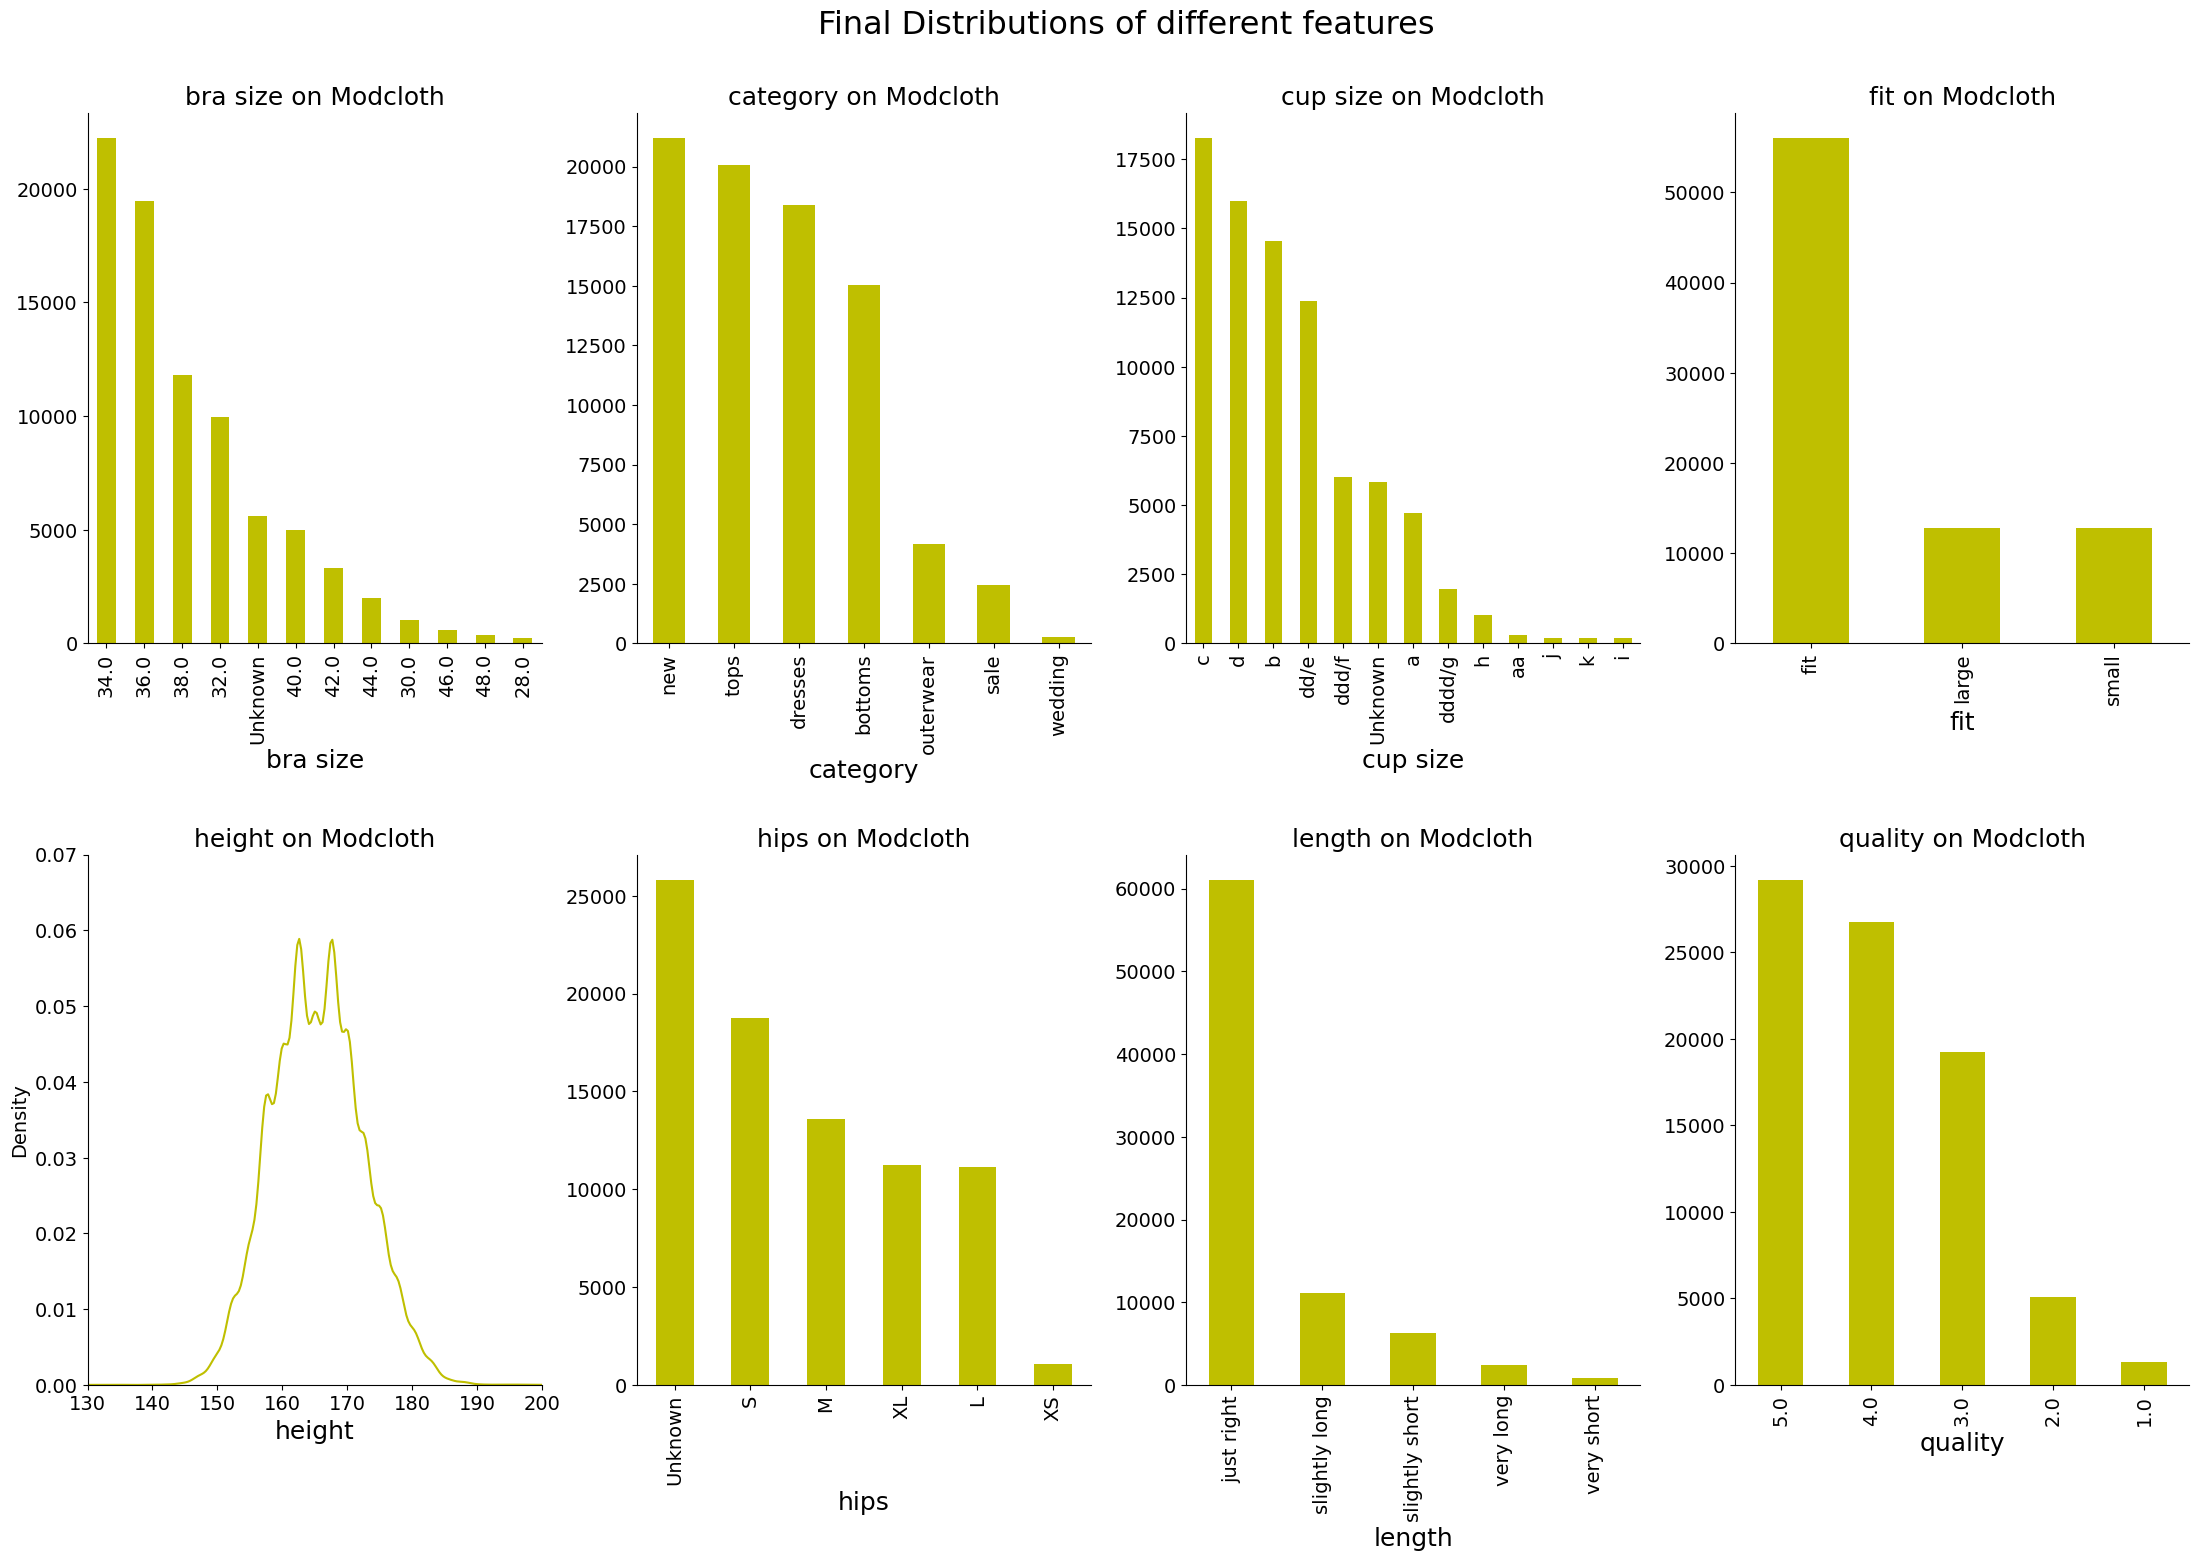

In [61]:
def plot_dist(col, ax):
    if col != 'height':
        mc_df[col].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    else:
        mc_df[col].plot(kind='density', ax=ax, bw_method=0.15, color='y')
        ax.set_xlim(130, 200)
        ax.set_ylim(0, 0.07)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} on Modcloth".format(col), fontsize=18)
    return ax


f, ax = plt.subplots(2,4, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra size','category', 'cup size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(2):
    for j in range(4):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Final Distributions of different features", fontsize= 23)

### 2. Danh mục so với Độ vừa vặn/Chiều dài/Chất lượng

#### Ở đây, chúng ta sẽ hình dung các mặt hàng thuộc các danh mục khác nhau như thế nào về mặt - độ vừa vặn, độ dài và chất lượng. Điều này sẽ cho Modcloth biết những danh mục nào cần được chú ý hơn!

#### Tôi đã vẽ 2 bản phân phối theo danh mục ở đây:

#### 1. Không chuẩn hóa - xem trực tiếp số lượng tần số - để so sánh giữa các danh mục. Chúng tôi cũng bao gồm thước đo chất lượng, độ dài hoặc độ phù hợp tốt nhất trong biểu đồ này.

#### 2. Chuẩn hóa - xem phân phối cho danh mục sau khi chuẩn hóa số lượng, giữa chính danh mục đó - nó sẽ giúp chúng tôi so sánh lý do chính để quay trở lại giữa chính danh mục đó là gì. Chúng tôi loại trừ các thước đo chất lượng và kích thước tốt nhất để tập trung vào các lý do chính mang lại lợi nhuận cho mỗi danh mục (nếu có).

In [63]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

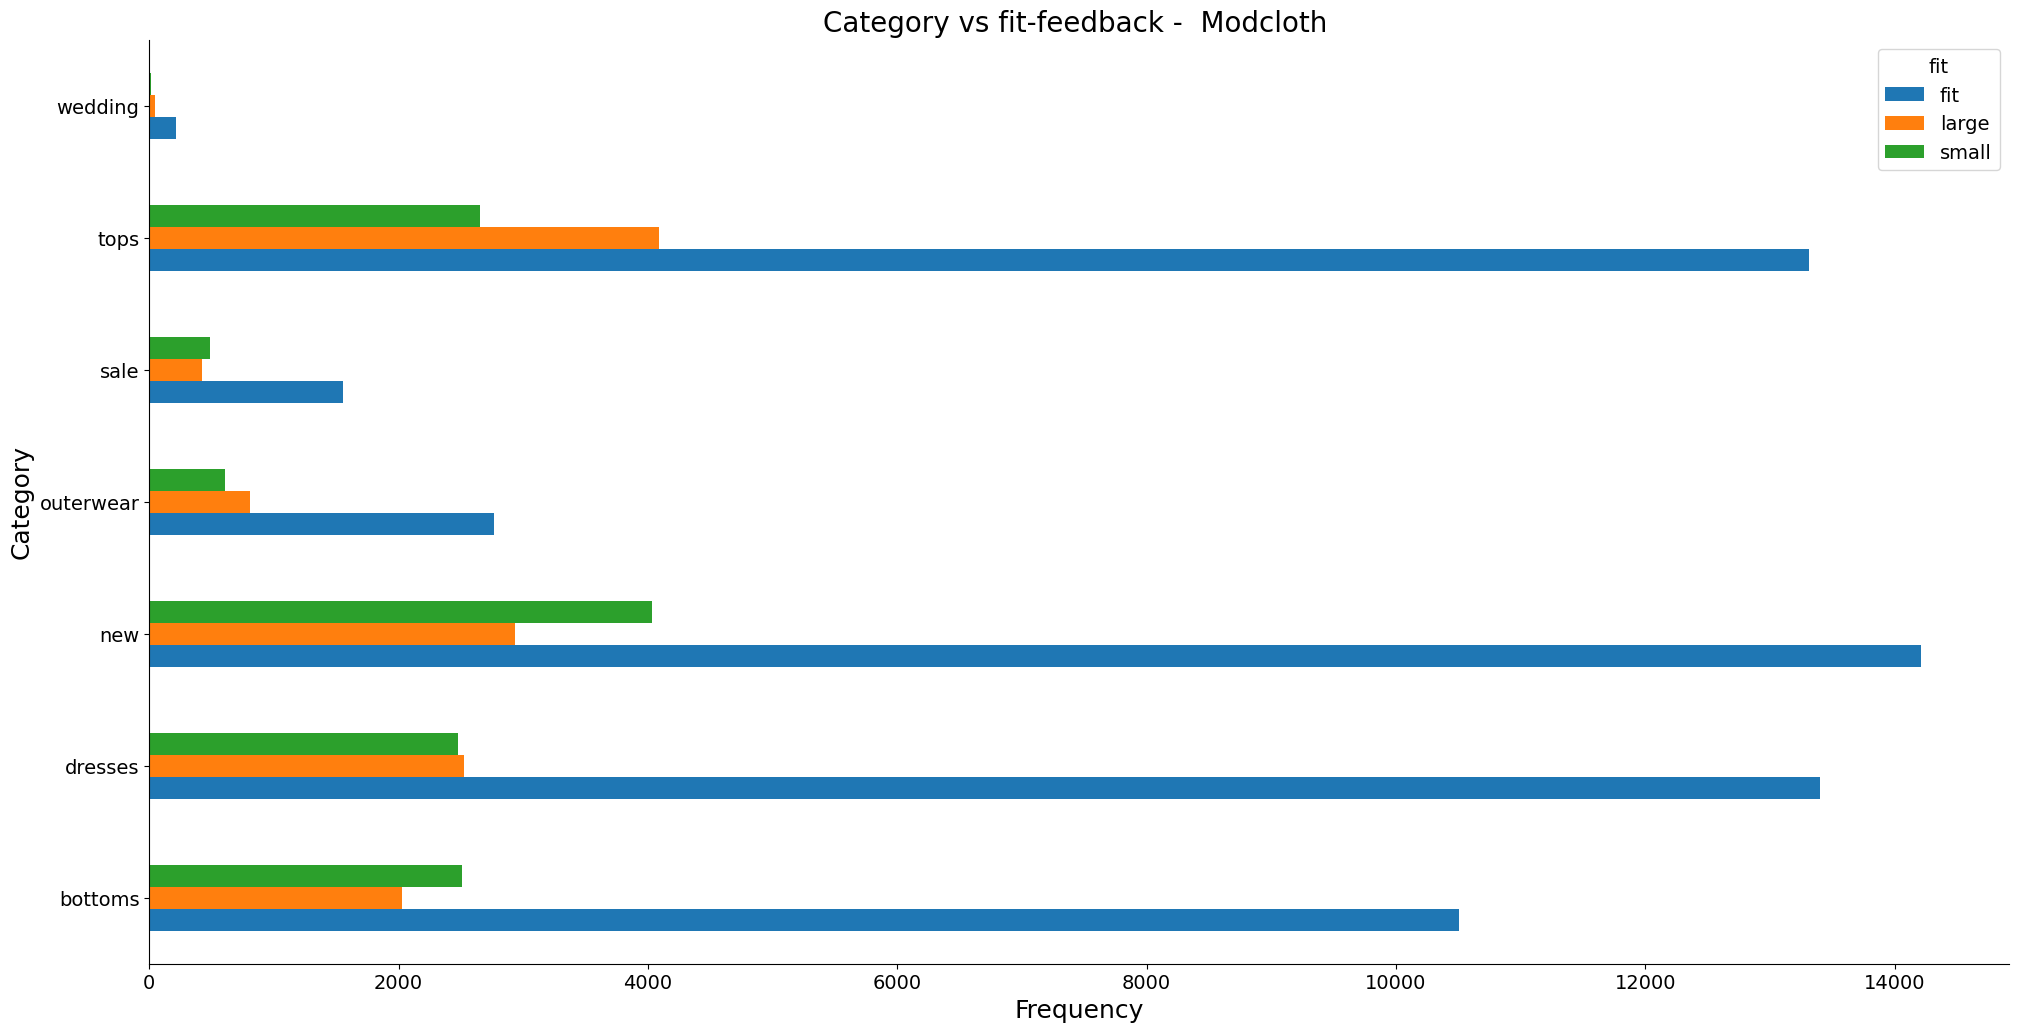

In [64]:
g_by_category = mc_df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')

#### Quan sát:

#### Phản hồi phù hợp nhất (vừa vặn) là cao nhất đối với các danh mục mới, váy và áo.

#### Nhìn chung, phản hồi không phù hợp tối đa chủ yếu thuộc về 2 loại - mới và cao cấp! Các loại váy và quần tiếp theo.

#### Đám cưới, áo khoác ngoài và hoạt động giảm giá không nổi bật trong hình dung của chúng tôi - chủ yếu là do thiếu giao dịch trong các danh mục này.

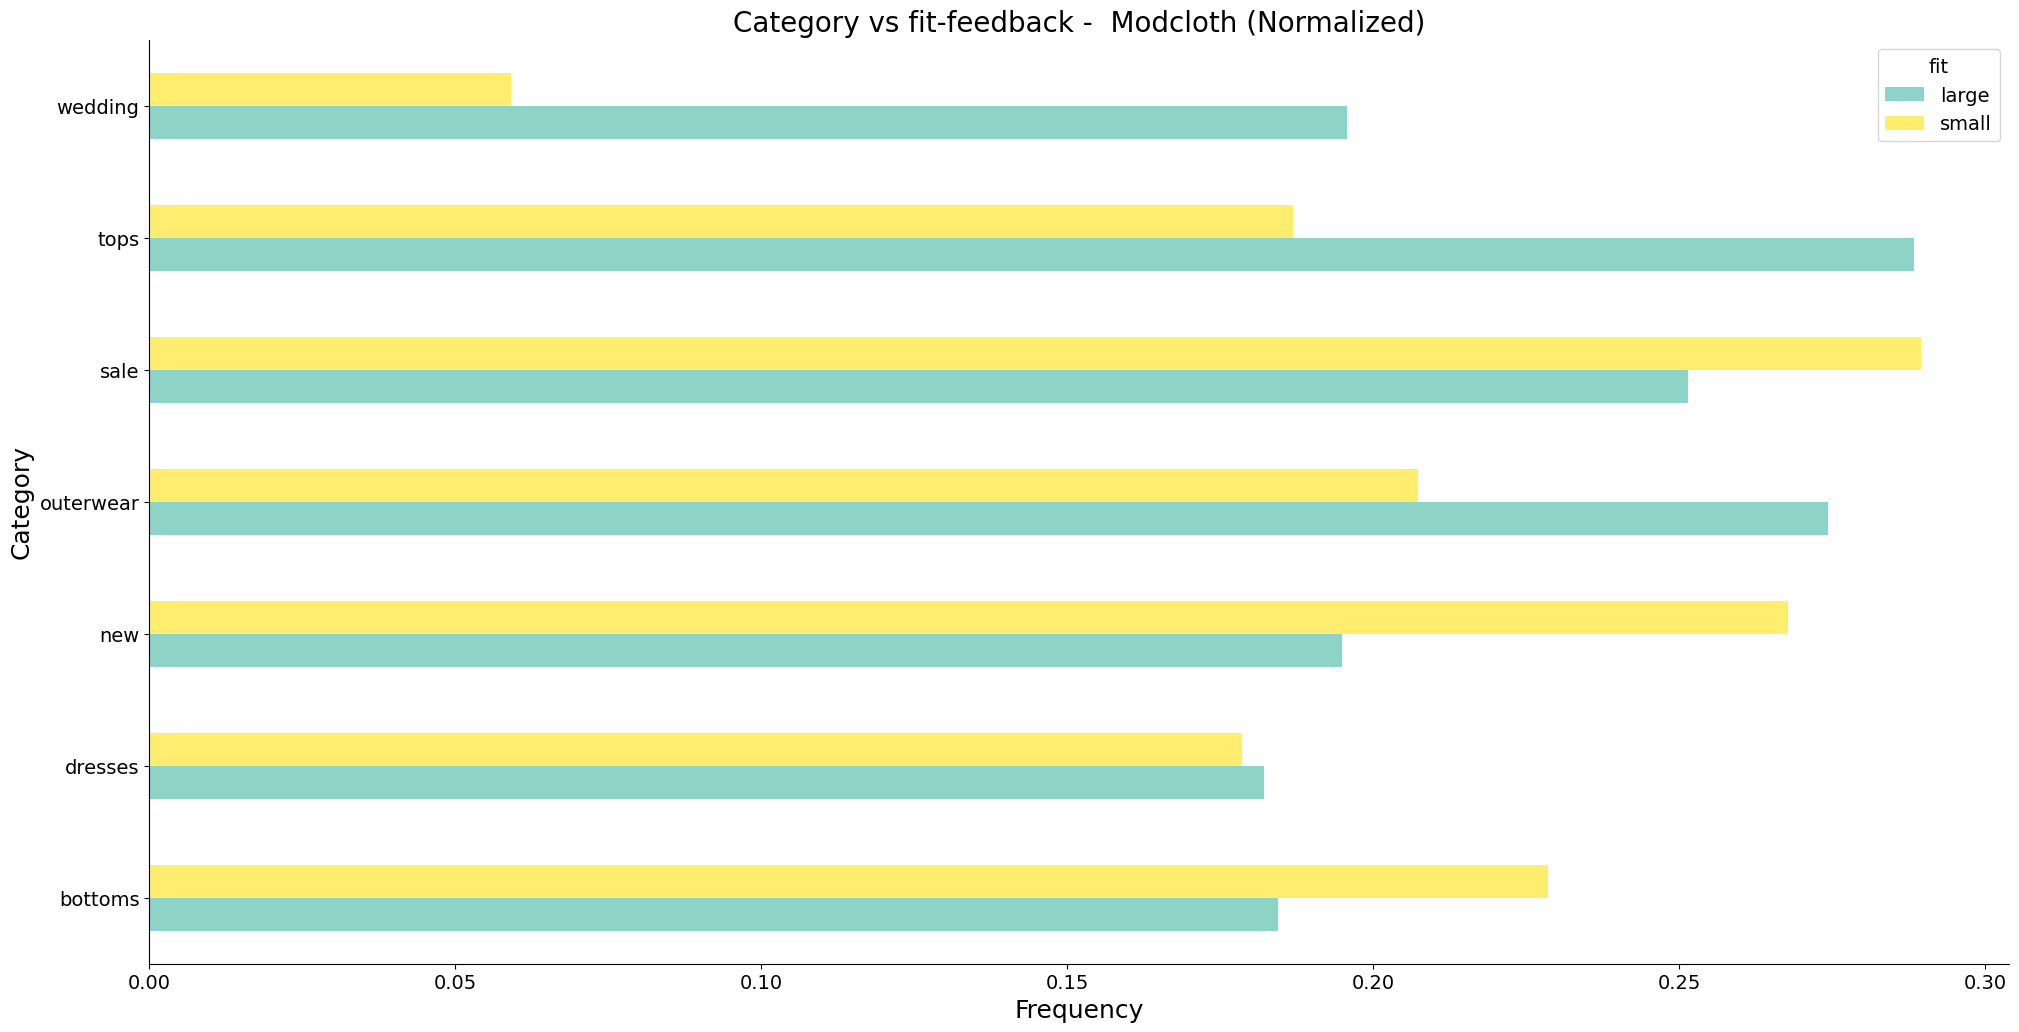

In [65]:
plot_barh(cat_fit_norm, 'fit', norm=1, cmap='Set3')

#### Ở đây, chúng ta có thể thấy điều đó trong số các danh mục:

#### Các danh mục áo cưới, áo sơ mi và áo khoác ngoài thường có nhiều lợi nhuận hơn do kích thước lớn.

#### Các sản phẩm mới, giảm giá và đáy thường có mức lợi nhuận thường xuyên do số lượng mua nhỏ.

#### Váy có lý do trả lại tương tự, xét về độ vừa vặn.

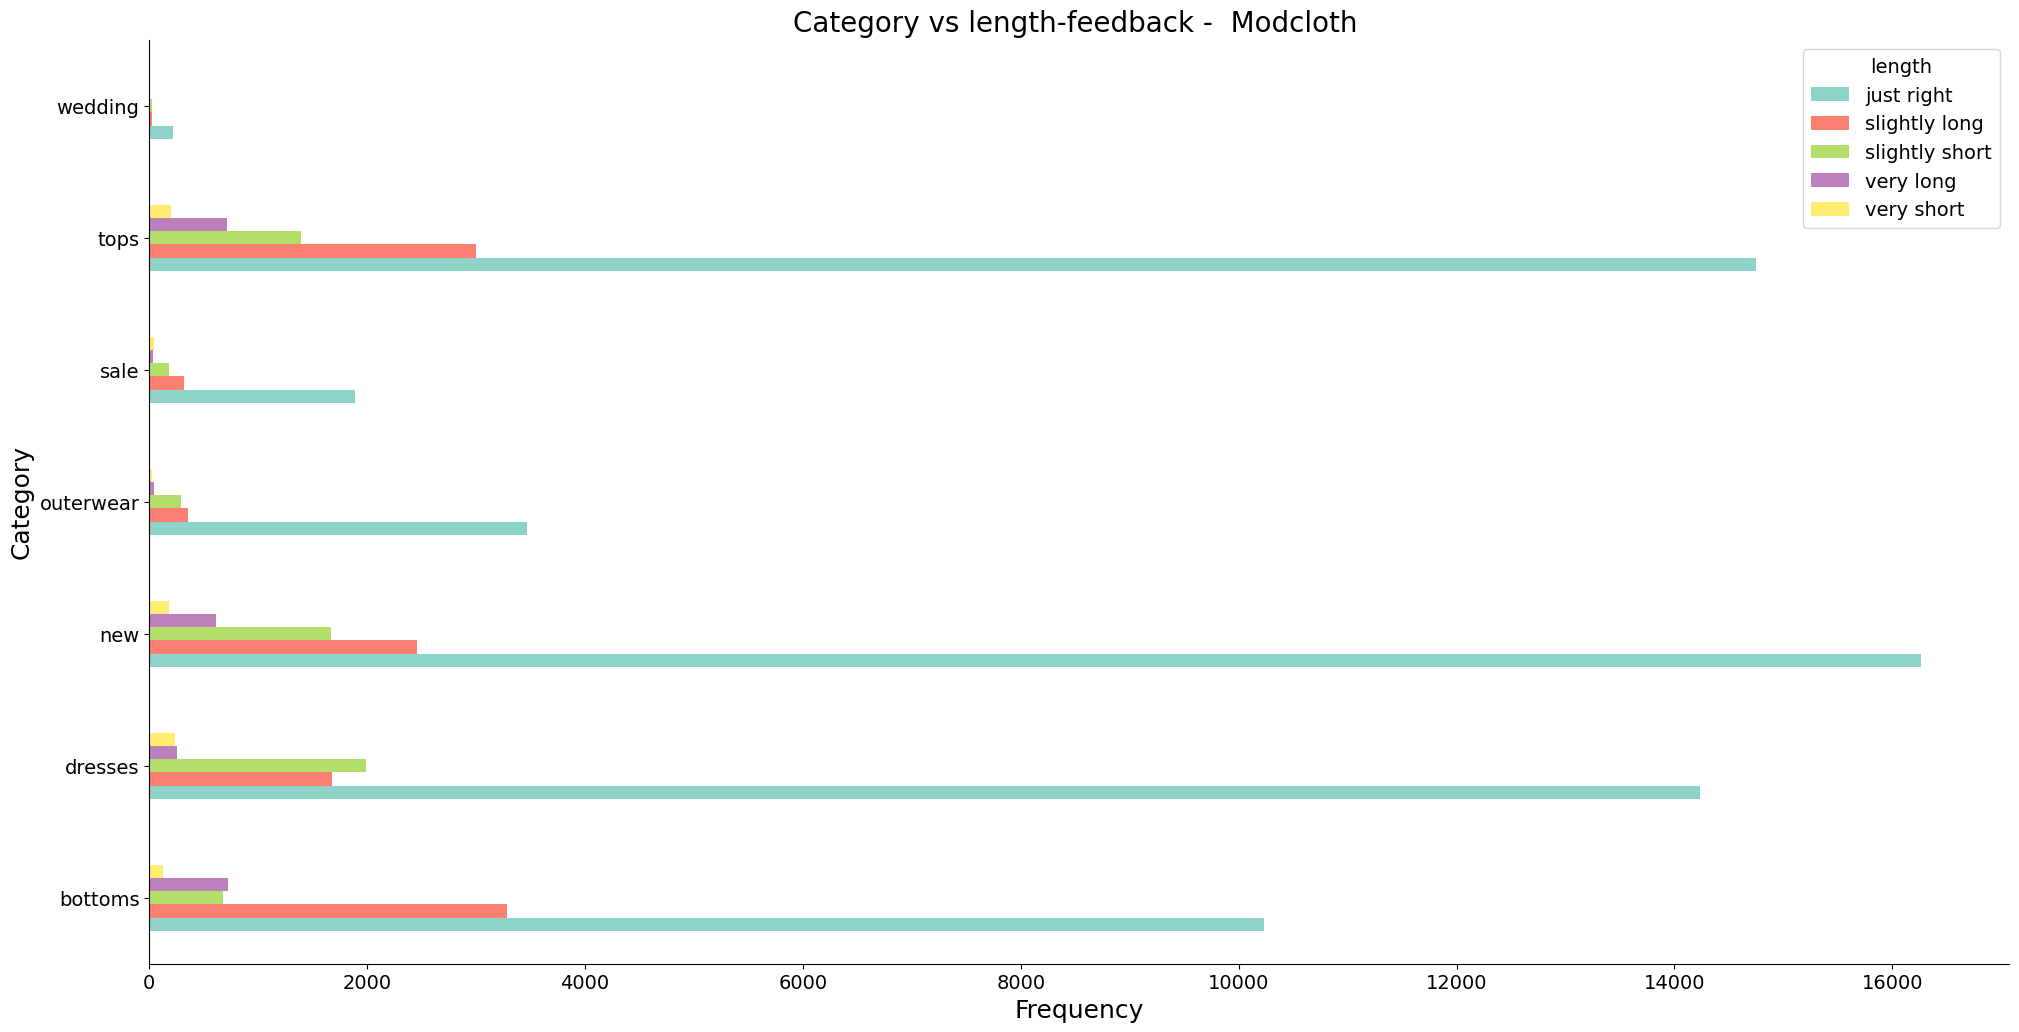

In [66]:
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')

### Độ dài phù hợp nhất ('vừa phải') thuộc về áo, mới, váy và quần! (Cũng do các danh mục này chiếm ưu thế trong tổng số giao dịch của chúng tôi - chúng chiếm gần 92% giao dịch của chúng tôi!)

#### Tất cả các giao dịch đều có chung một thứ tự lý do trả lại (theo thứ tự quan trọng), cũng mang tính trực quan:

#### .hơi dài

#### .hơi ngắn

#### .rất dài

#### .rất ngắn

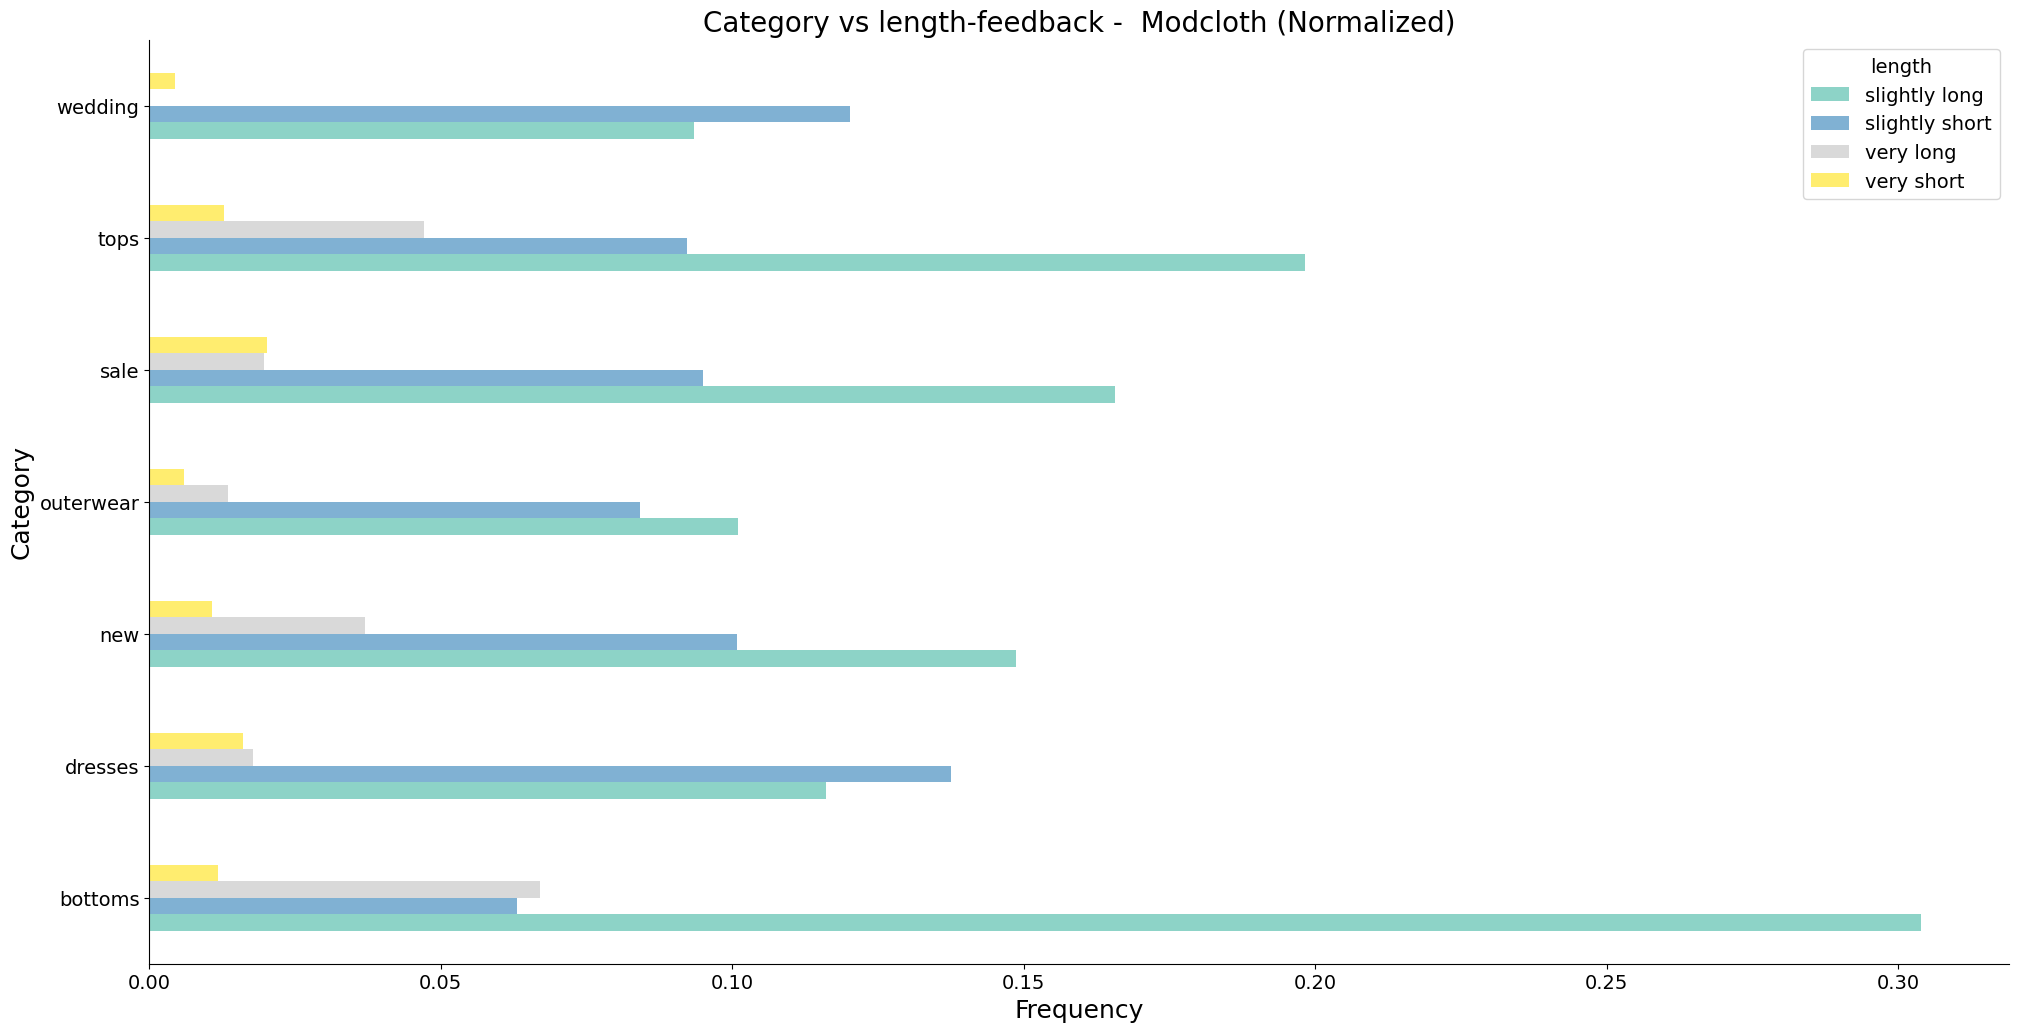

In [67]:
cat_len_norm = norm_counts(cat_len)
cat_len_norm.drop(['just right'], axis = 1, inplace=True)
plot_barh(cat_len_norm, 'length', cmap='Set3', norm=1)

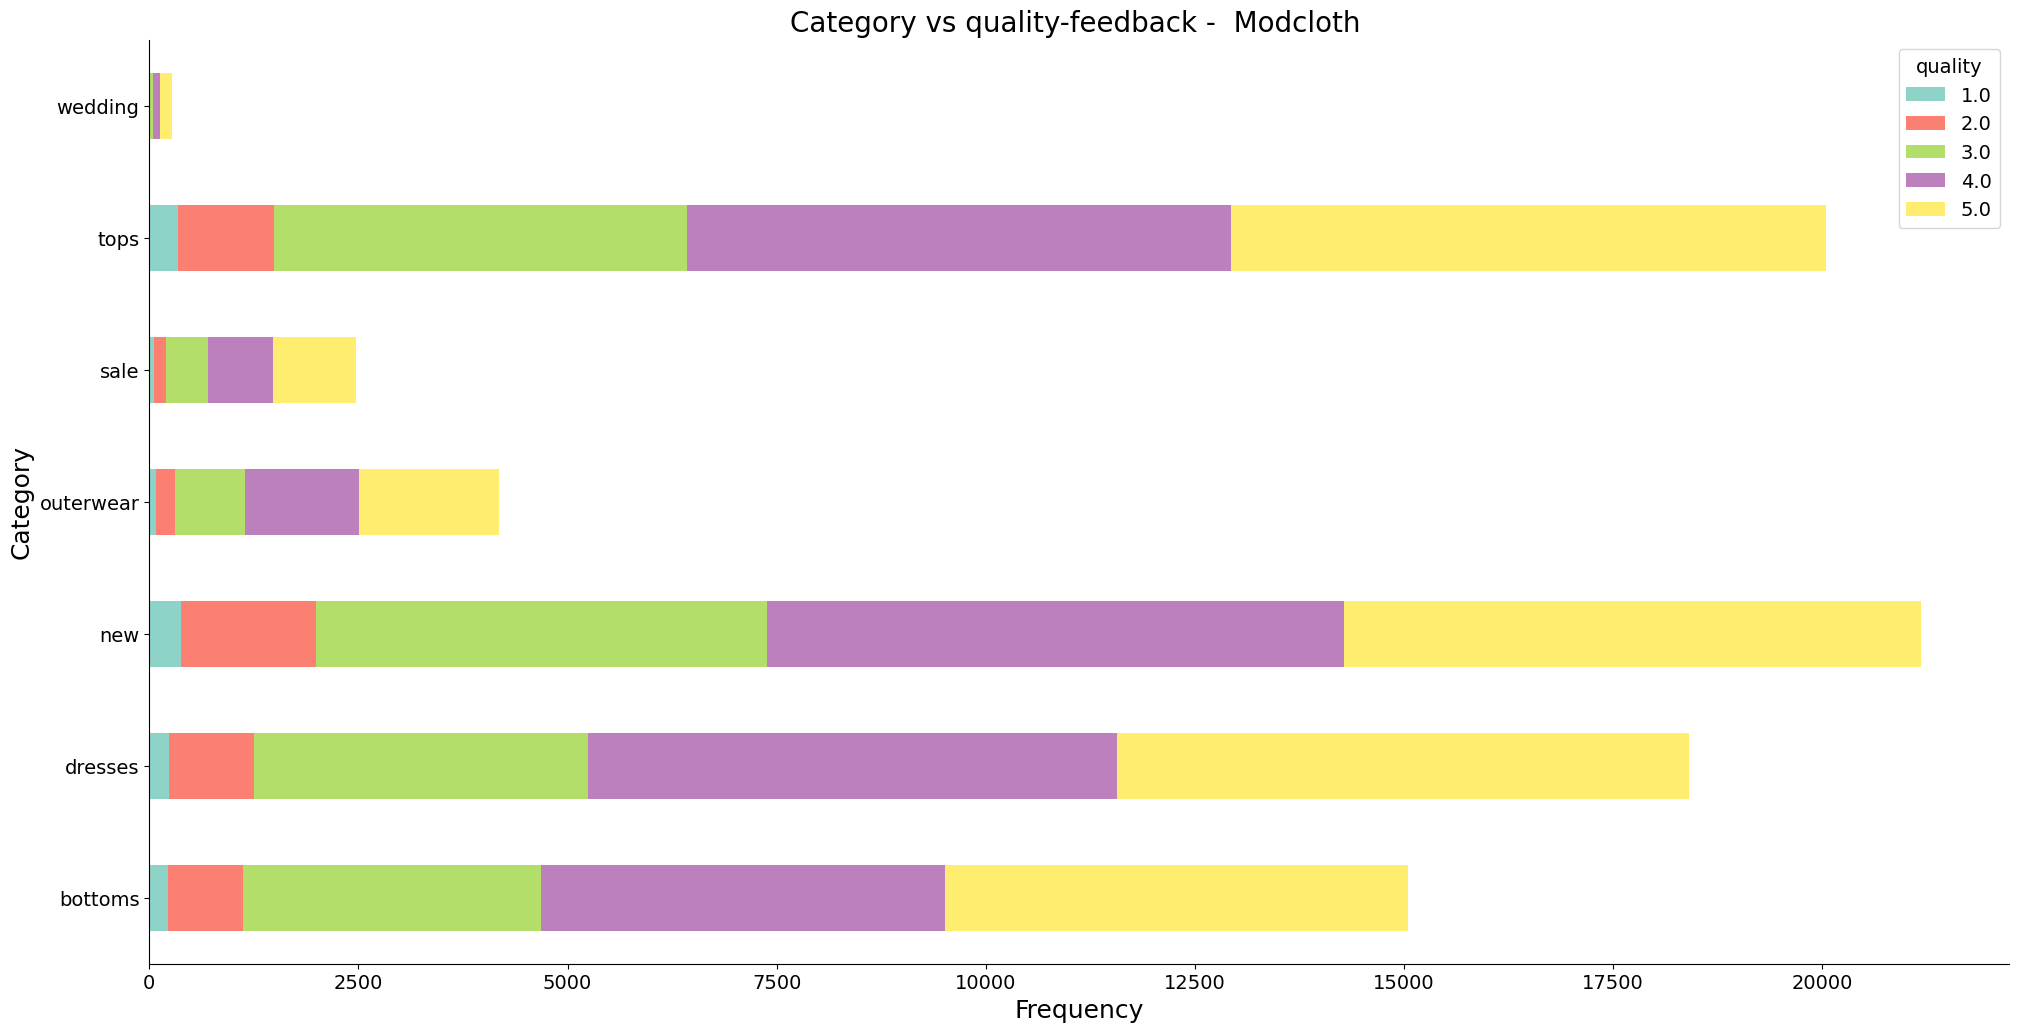

In [68]:
cat_quality = g_by_category['quality'].value_counts()
cat_quality = cat_quality.unstack()
plot_barh(cat_quality, 'quality', 'Set3', stacked=1)

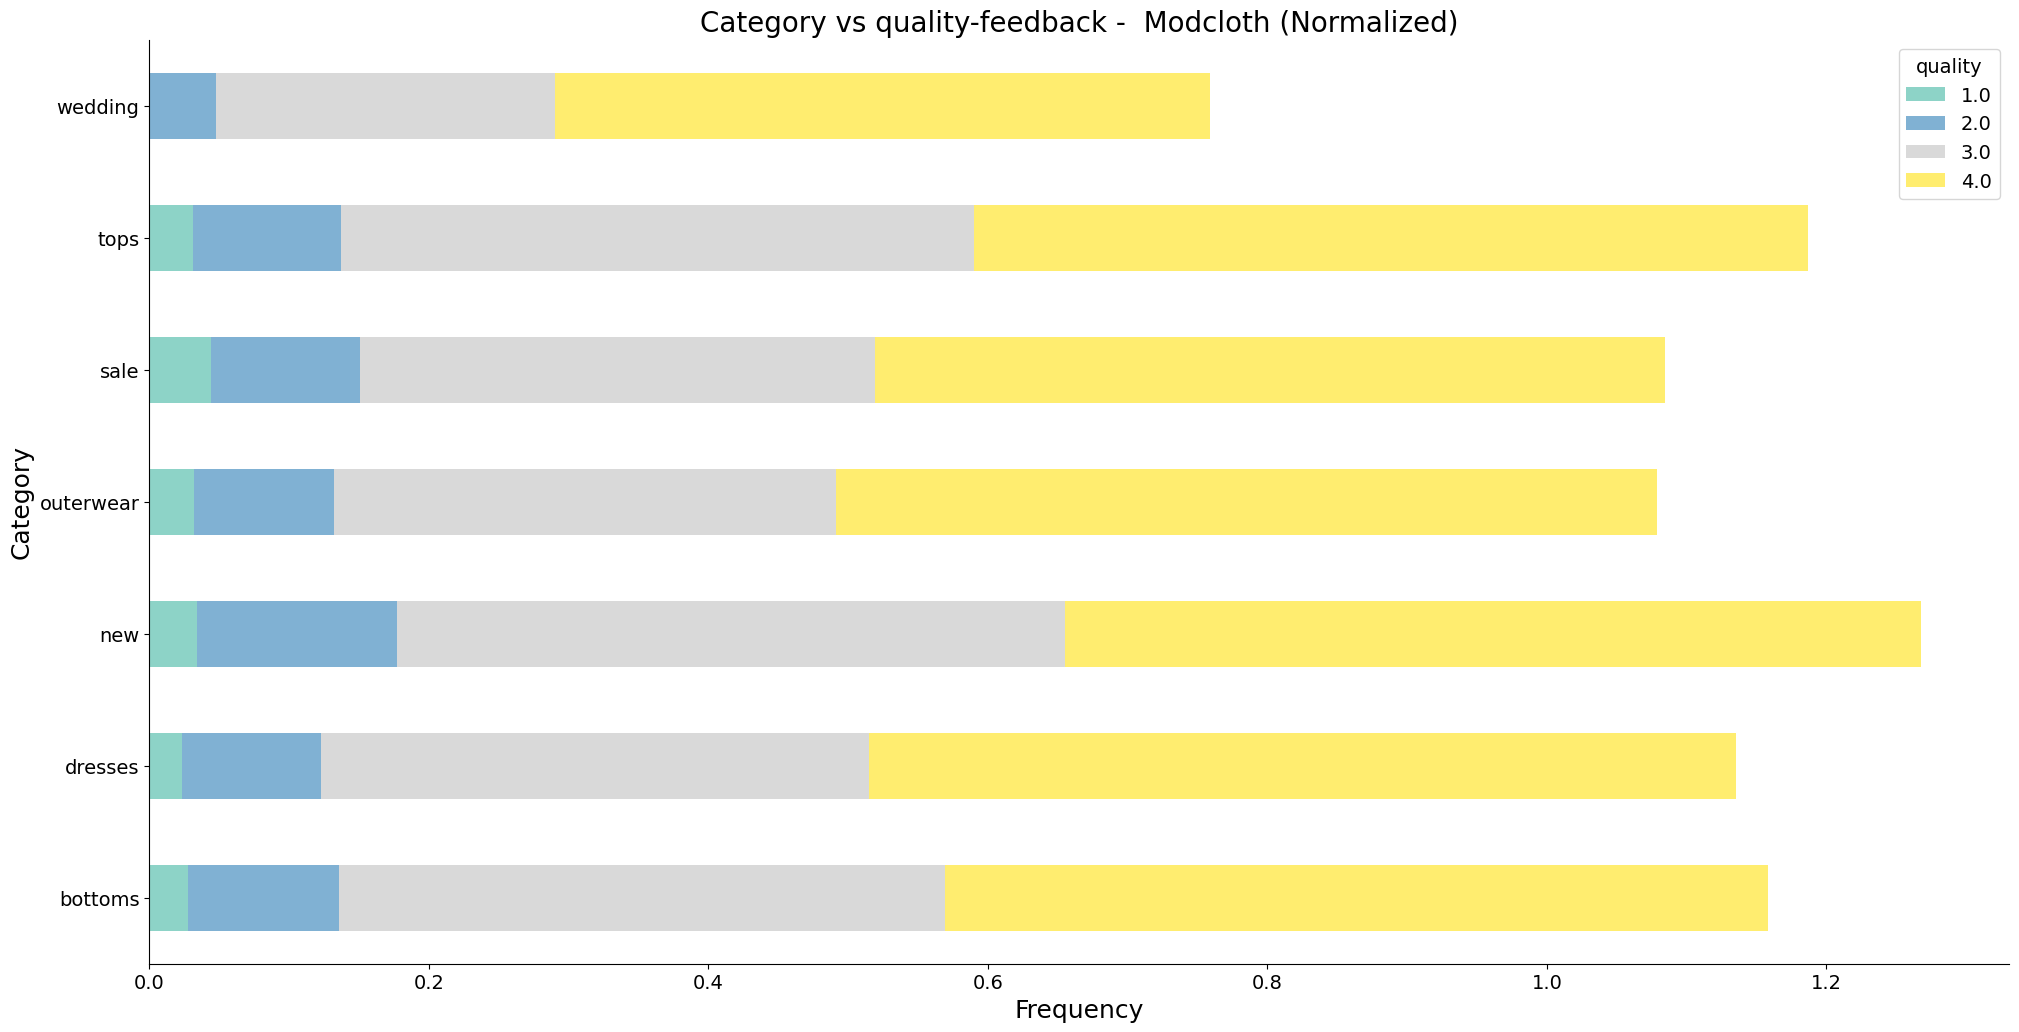

In [69]:
cat_quality_norm = norm_counts(cat_quality)
cat_quality_norm.drop([5.0], axis = 1, inplace=True)
plot_barh(cat_quality_norm, 'quality', 'Set3', stacked=1, norm=1)

#### 2. Tổng số người dùng so với tổng số mặt hàng đã mua

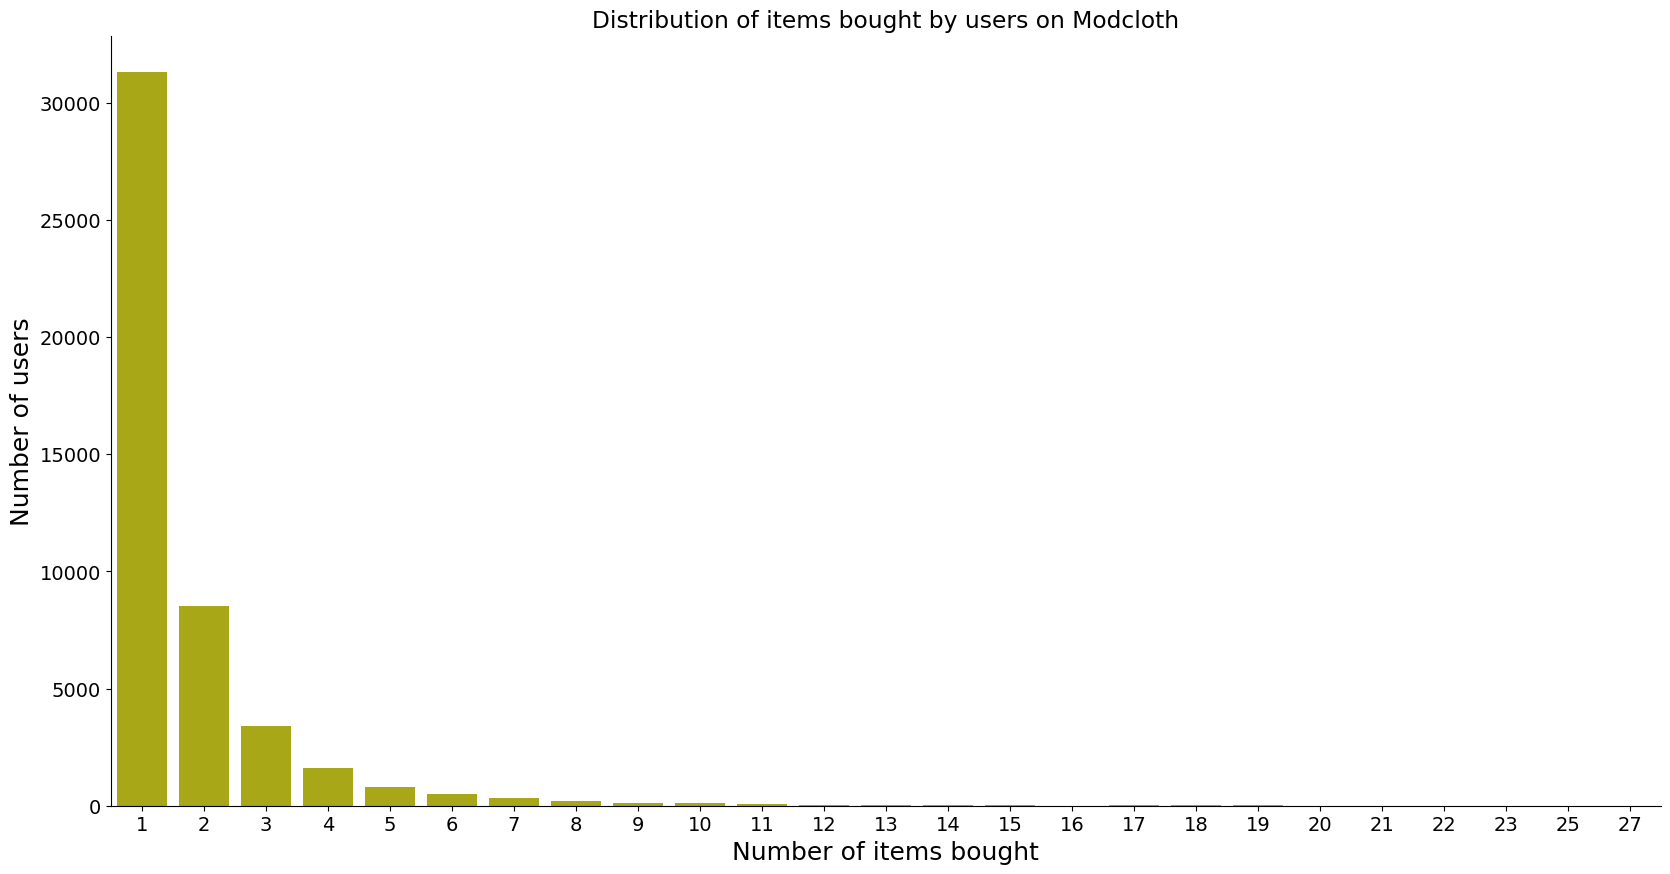

In [70]:
# Users who bought so many items
items_bought = []
total_users = []
for i in range(min(mc_df.user_id.value_counts()), max(mc_df.user_id.value_counts())+1):
    all_users = sum(mc_df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)

#### 3. Chiều cao và size giày - Khách hàng Modcloth

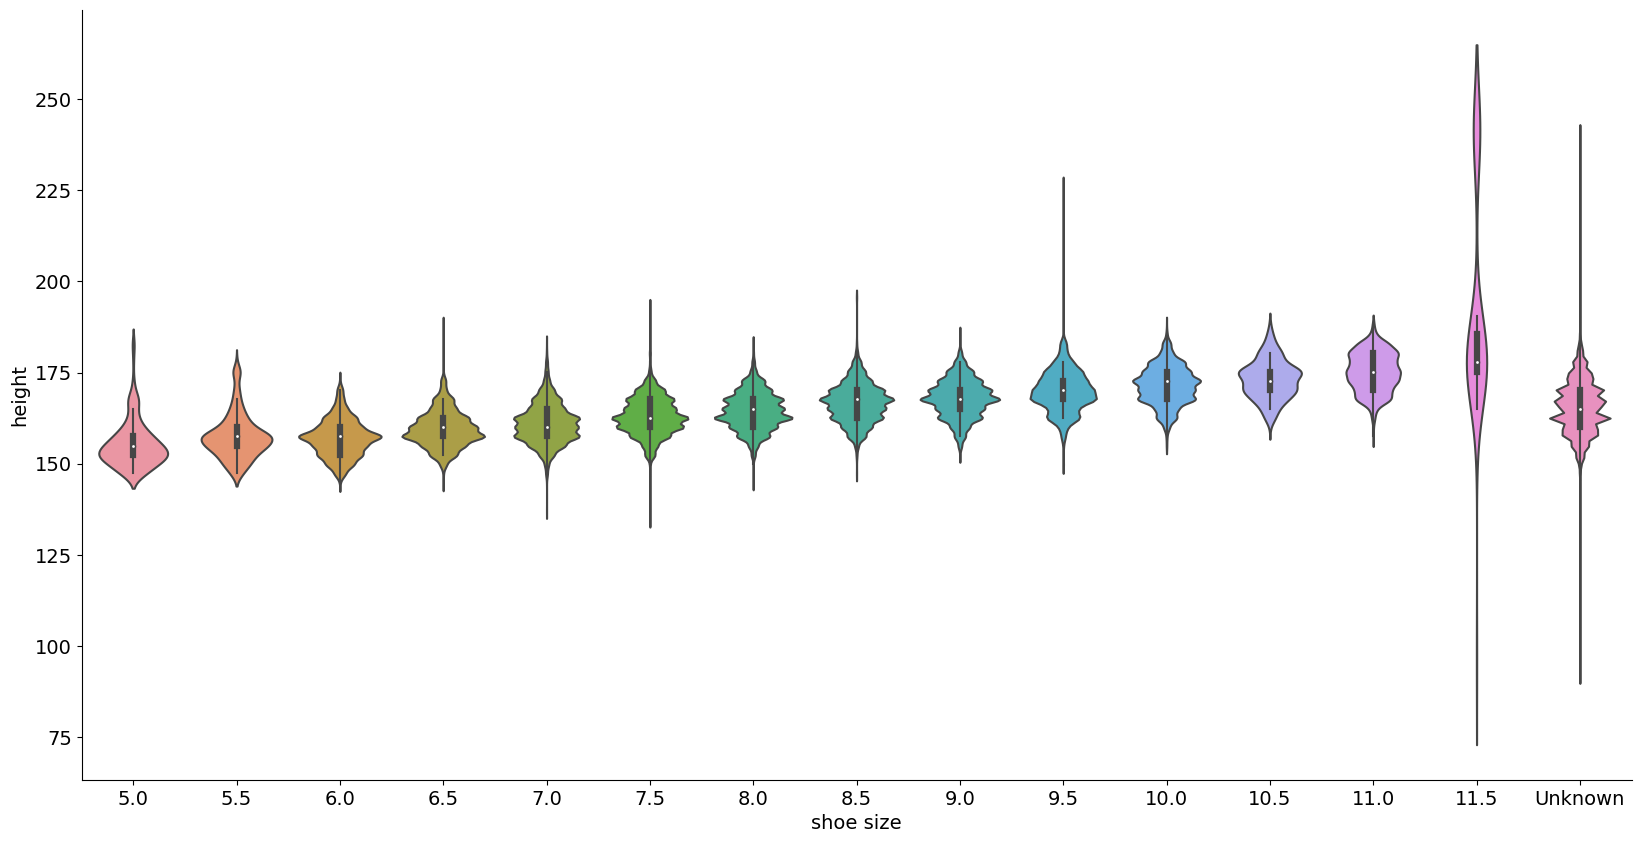

In [72]:
fig = plt.gcf()
fig.set_size_inches(20,10)
__ = sns.violinplot(x='shoe size', y='height',data=mc_df, size = 20)